In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import MinMaxScaler

In [200]:
# Load the dataset
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
# View the first few rows of the data
pd.set_option('display.max_columns', None) # This is so we can view all columns
print(data.head())
# print(data.OverallQual.value_counts())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [138]:
print(data.shape)

(1460, 81)


In [5]:
# Get information about the columns and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Get summary statistics of the numerical columns
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Assign categorical and numeric columns based on data types

categorical_cols = data.select_dtypes(include='object')
numeric_cols = data.select_dtypes(include=['int', 'float']).columns
# Check the unique values in each categorical column
for col in categorical_cols:
    print(col)
    print(data[col].unique())
    print('============')

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
Street
['Pave' 'Grvl']
Alley
[nan 'Grvl' 'Pave']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st
['VinylSd' 'MetalSd'

In [9]:
# Check for missing values in the dataset
pd.set_option('display.max_rows', None) # This is so we can view all rows

data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [201]:
data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)

In [202]:
# Handle missing values based on the context of the data
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
data['MasVnrArea'].fillna(0, inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace=True)
data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [140]:
data.shape

(1460, 76)

In [203]:
object_columns_with_missing_values = data.select_dtypes(include='object').columns[data.select_dtypes(include='object').isnull().any()]
object_columns_with_missing_values
# Iterate over object columns with missing values
for column in object_columns_with_missing_values:
    mode_value = data[column].mode().iloc[0]  # Compute the mode for the column
    
    # Replace missing values with the mode
    data[column].fillna(mode_value, inplace=True)

In [142]:
data.shape

(1460, 76)

In [66]:
# Drop columns with more than 70% missing data
threshold = 0.7  # Set the threshold for missing data percentage
missing_data_percentage = data.isnull().mean()  # Compute the missing data percentage for each column
columns_to_drop = missing_data_percentage[missing_data_percentage > threshold].index  # Get columns with missing data above the threshold
data.drop(columns_to_drop, axis=1, inplace=True)  # Drop the columns with more than 70% missing data

In [130]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [16]:
data.dropna(inplace=True)

In [19]:
# Check for duplicates in the dataset
duplicates = data.duplicated()
print("Number of duplicates:", duplicates.sum())

# Show the duplicate rows (none here)
duplicate_rows = data[duplicates]
print("Duplicate rows:")
print(duplicate_rows)

# If there had been any duplicates, this is how to remove them
data.drop_duplicates(inplace=True)

# # Convert data types
# data['column_name'] = data['column_name'].astype('int')

Number of duplicates: 0
Duplicate rows:
Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []


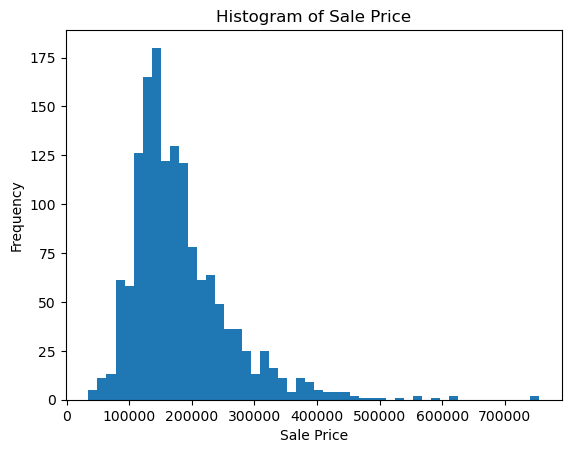

In [20]:
#  Histogram
plt.hist(data['SalePrice'], bins=50)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Price')
plt.show()

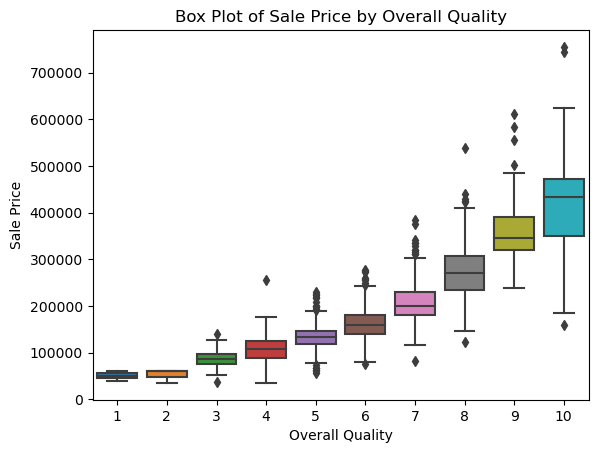

In [21]:
sns.boxplot(x=data['OverallQual'], y=data['SalePrice'])
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by Overall Quality')
plt.show()

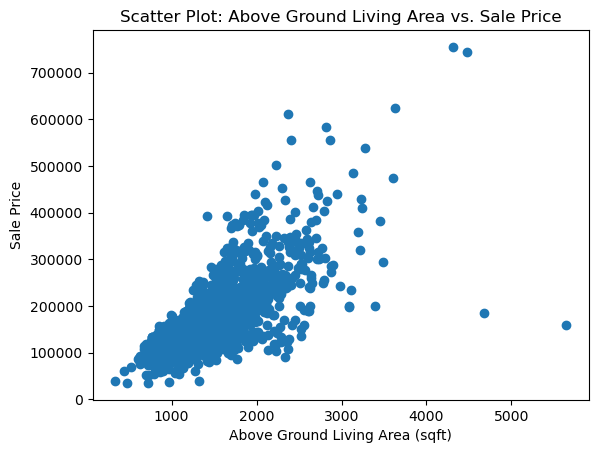

In [25]:
# Scatter Plot
plt.scatter(data['GrLivArea'], data['SalePrice'])
plt.xlabel('Above Ground Living Area (sqft)')
plt.ylabel('Sale Price')
plt.title('Scatter Plot: Above Ground Living Area vs. Sale Price')
plt.show()

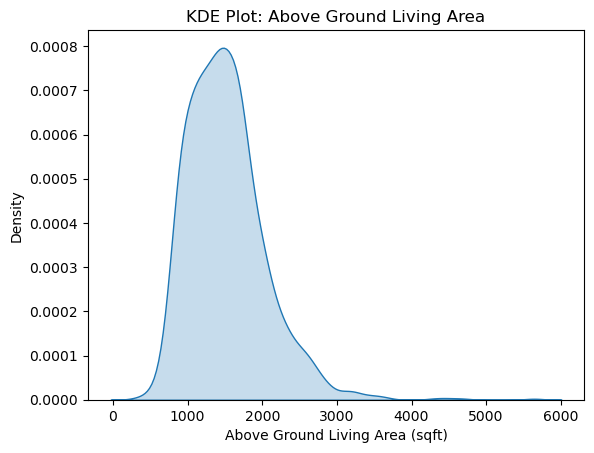

In [26]:
# Kernel Density Estimation (KDE) plot
sns.kdeplot(data['GrLivArea'], fill=True)
plt.xlabel('Above Ground Living Area (sqft)')
plt.ylabel('Density')
plt.title('KDE Plot: Above Ground Living Area')
plt.show()

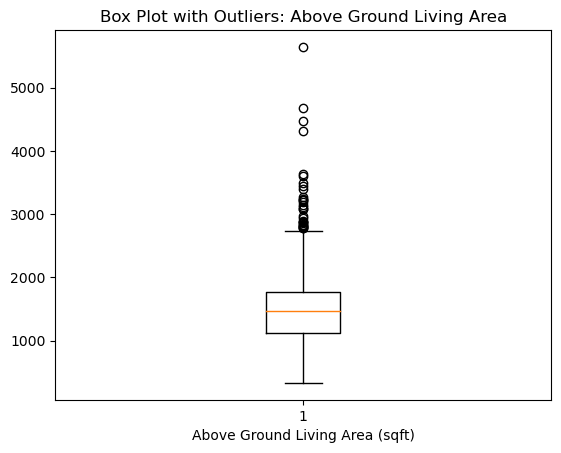

In [31]:
# Box Plot with outliers shown
plt.boxplot(data['GrLivArea'], showfliers=True)
plt.xlabel('Above Ground Living Area (sqft)')
plt.title('Box Plot with Outliers: Above Ground Living Area')
plt.show()

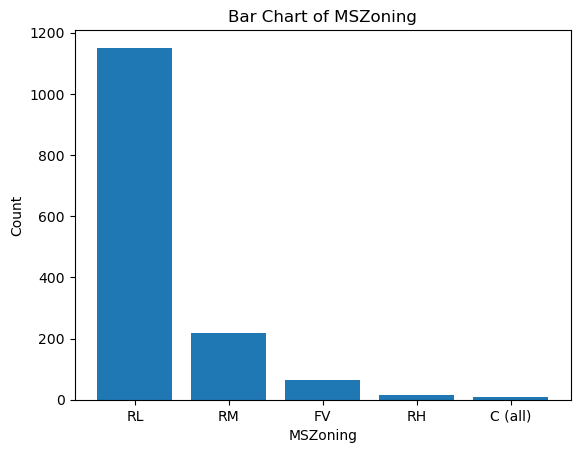

In [32]:
# Multivariate Analysis
plt.bar(data['MSZoning'].value_counts().index, data['MSZoning'].value_counts().values)
plt.xlabel('MSZoning')
plt.ylabel('Count')
plt.title('Bar Chart of MSZoning')
plt.show()

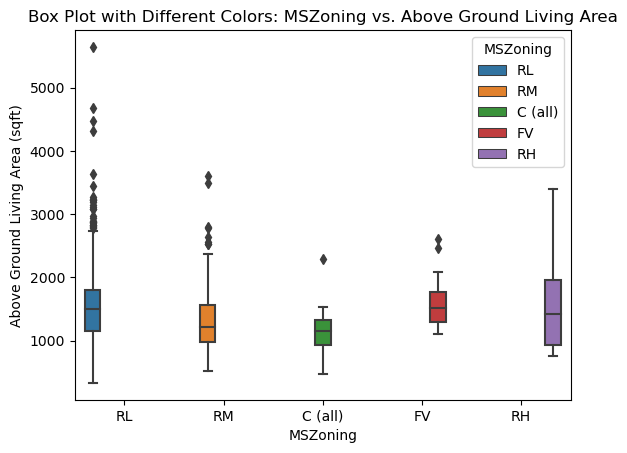

In [33]:
# Box Plot with different colors for each category
sns.boxplot(x='MSZoning', y='GrLivArea', data=data, hue='MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('Above Ground Living Area (sqft)')
plt.title('Box Plot with Different Colors: MSZoning vs. Above Ground Living Area')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 79.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 36.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 7.7% of the points cannot be placed; yo

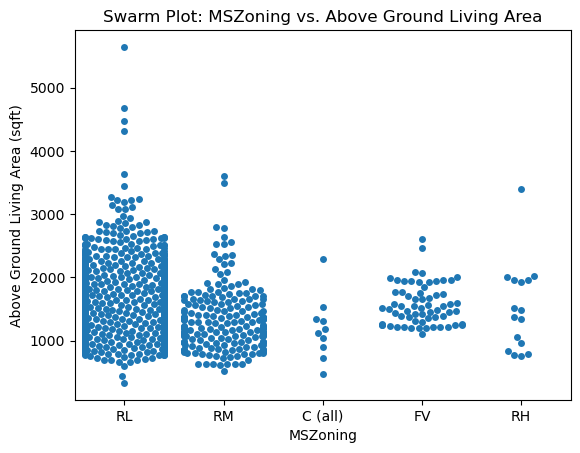

In [34]:
# Swarm Plot
sns.swarmplot(x='MSZoning', y='GrLivArea', data=data)
plt.xlabel('MSZoning')
plt.ylabel('Above Ground Living Area (sqft)')
plt.title('Swarm Plot: MSZoning vs. Above Ground Living Area')
plt.show()

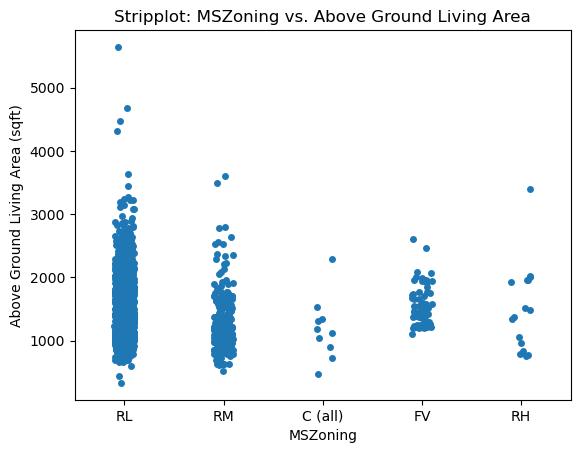

In [35]:
sns.stripplot(x='MSZoning', y='GrLivArea', data=data)
plt.xlabel('MSZoning')
plt.ylabel('Above Ground Living Area (sqft)')
plt.title('Stripplot: MSZoning vs. Above Ground Living Area')
plt.show()

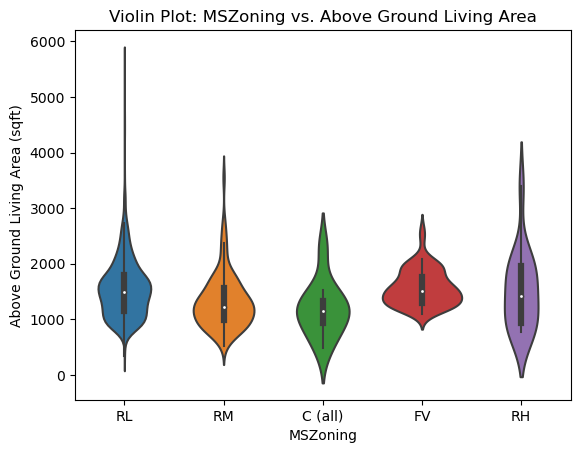

In [36]:
# Violin plots
sns.violinplot(x='MSZoning', y='GrLivArea', data=data)
plt.xlabel('MSZoning')
plt.ylabel('Above Ground Living Area (sqft)')
plt.title('Violin Plot: MSZoning vs. Above Ground Living Area')
plt.show()

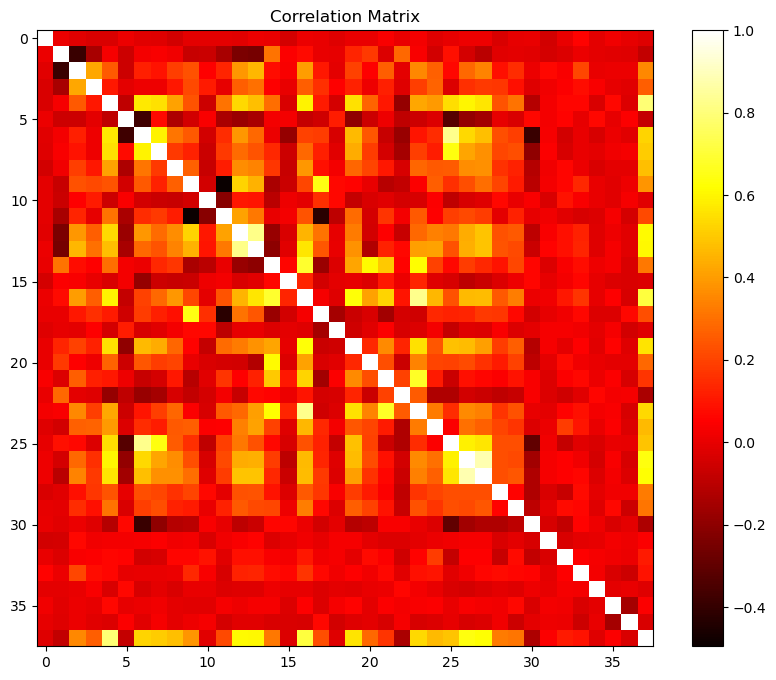

In [37]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))  # Adjust the values to increase or decrease the figure size
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

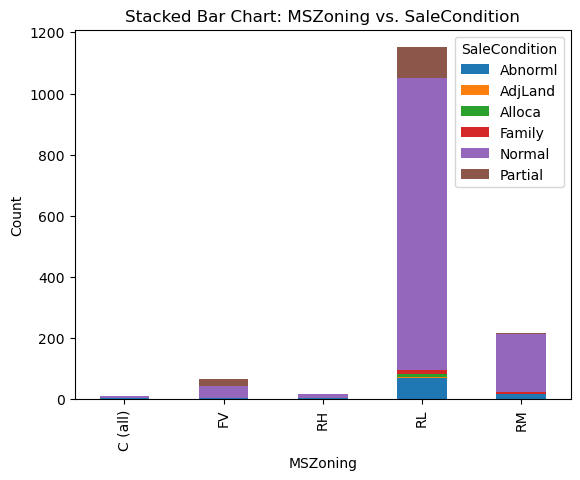

In [38]:
# Stacked Bar Chart
cross_tab = pd.crosstab(data['MSZoning'], data['SaleCondition'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('MSZoning')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: MSZoning vs. SaleCondition')
plt.show()

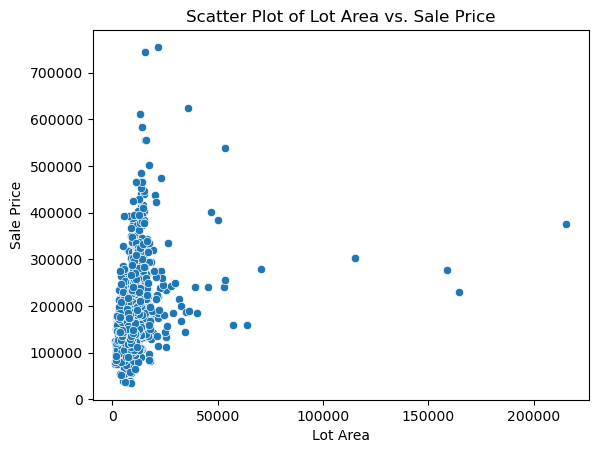

In [39]:
sns.scatterplot(x='LotArea', y='SalePrice', data=data)
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Scatter Plot of Lot Area vs. Sale Price')
plt.show()

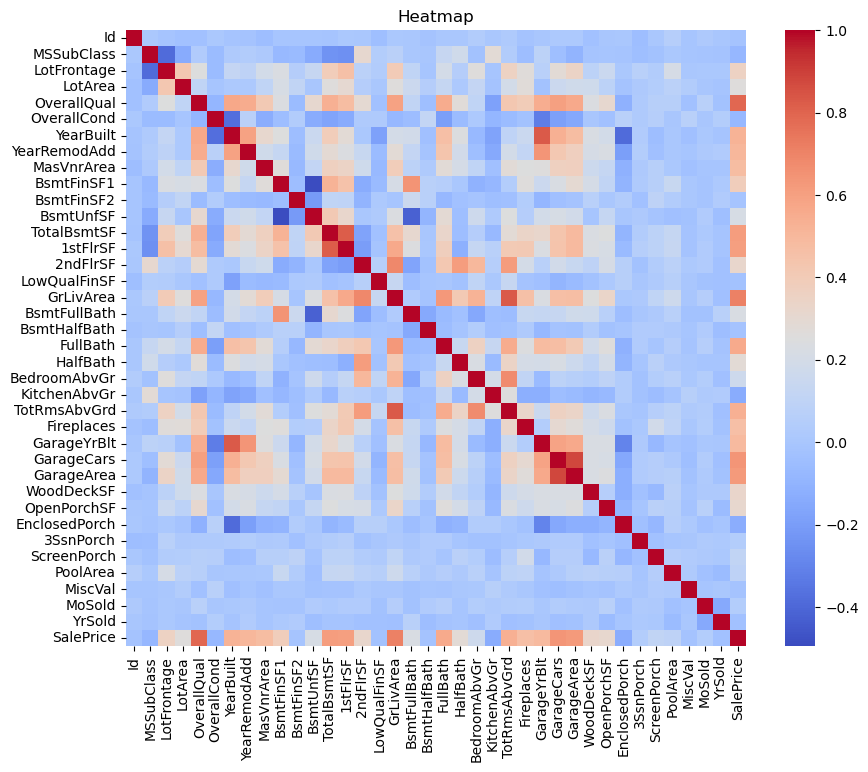

In [40]:
# Heatmap
plt.figure(figsize=(10, 8))  # Adjust the values to increase or decrease the figure size
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

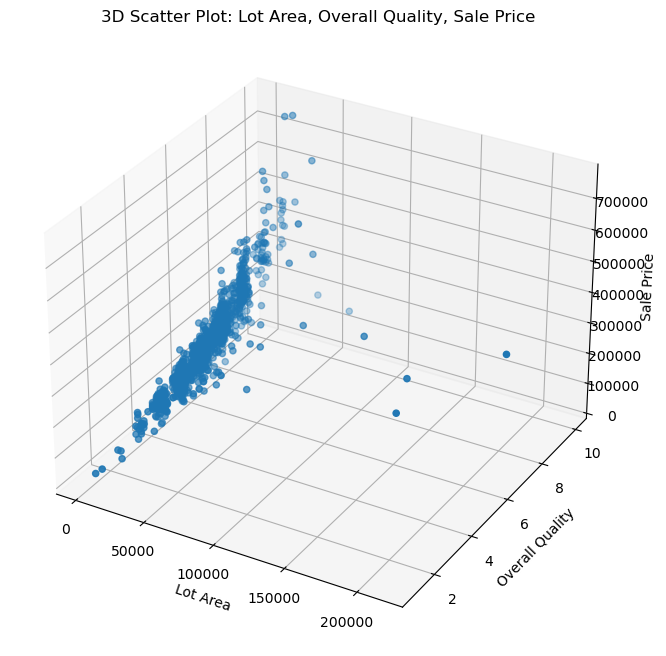

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')

# Select the three variables for the 3D scatter plot
x = data['LotArea']
y = data['OverallQual']
z = data['SalePrice']

ax.scatter(x, y, z)

ax.set_xlabel('Lot Area')
ax.set_ylabel('Overall Quality')
ax.set_zlabel('Sale Price')

plt.title('3D Scatter Plot: Lot Area, Overall Quality, Sale Price')
plt.show()

In [204]:
# Feature Engineering
# data['TotalBath'] = data['FullBath'] + data['HalfBath']
data['HasGarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data['HouseAge'] = data['YrSold'] - data['YearBuilt']

In [205]:
data["SqFtPerRoom"] = data["GrLivArea"] / (data["TotRmsAbvGrd"] +
                                                       data["FullBath"] +
                                                       data["HalfBath"] +
                                                       data["KitchenAbvGr"])

data['MeanRates'] = (data['OverallQual'] + data['OverallCond'])/2

data['TotalBathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) +
                               data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))

data["1st_and_2nd_SF"] = data["1stFlrSF"] + data["2ndFlrSF"]

In [168]:
# from sklearn.preprocessing import StandardScaler

# # Select numeric columns for scaling
# numeric_columns = data.select_dtypes(include='number').columns

# # Create a StandardScaler object
# scaler = StandardScaler()

# # Scale the numeric columns
# data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# # We can also Normalize Features using MinMaxScaler. This transforms the values between 0 and 1. Do either Standardization (zscoring) OR Normalization, NOT both.

# # Select numeric columns for scaling
# numeric_columns = data.select_dtypes(include='number').columns

# scaler = MinMaxScaler()
# data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Select categorical columns for encoding
categorical_columns = data.select_dtypes(include='object').columns

# Perform one-hot encoding
encoded_data = pd.get_dummies(data, columns=categorical_columns)

# # Print the encoded data
# print(encoded_data)

In [132]:
group1 = data[data['OverallQual'] >= 7]['SalePrice']
group2 = data[data['OverallQual'] < 7]['SalePrice']
t_statistic, p_value = ttest_ind(group1, group2)
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)

T-Statistic: 33.41054375054213
P-Value: 3.266826829209649e-182


In [46]:
# Chi-Square Test
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(data['MSZoning'], data['CentralAir']))
print('Chi-Square:', chi2)
print('P-Value:', p)



Chi-Square: 132.3537614723155
P-Value: 1.2217031702230047e-27


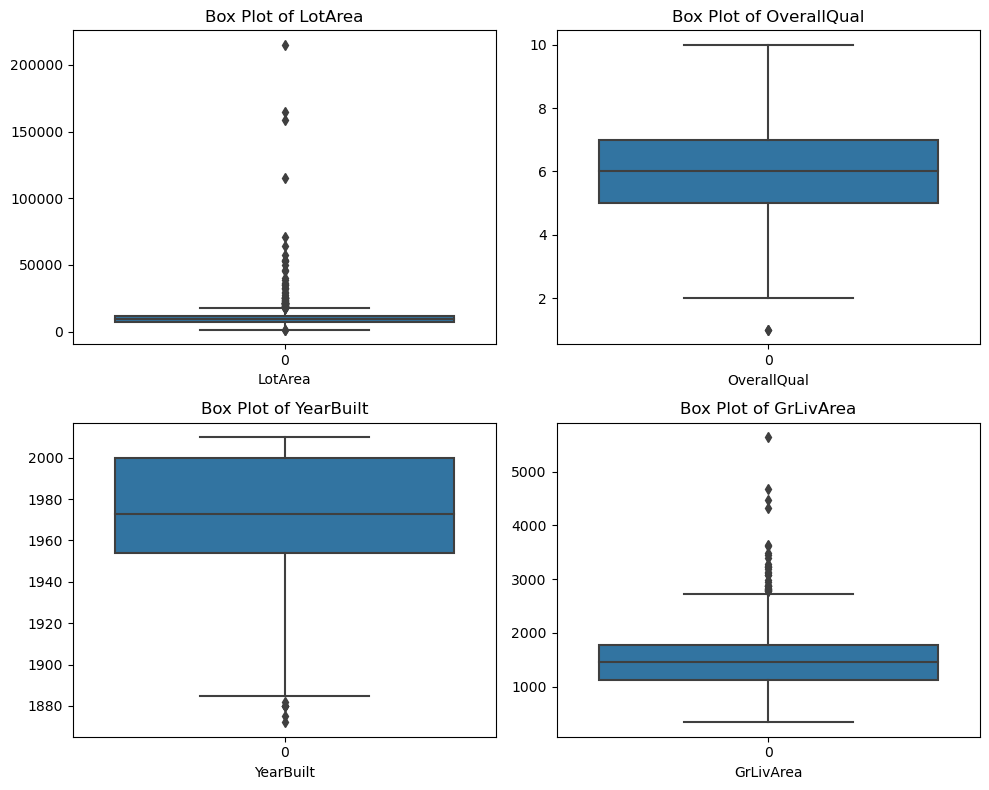

In [47]:
columns_to_check = ['LotArea', 'OverallQual', 'YearBuilt', 'GrLivArea']

plt.figure(figsize=(10, 8))  # Adjust the figure size if needed

for i, column in enumerate(columns_to_check):
    plt.subplot(2, 2, i+1)  # Create subplots for each column
    sns.boxplot(data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [206]:
# Handling outliers by winsorizing
from scipy.stats import mstats
data['LotArea'] = mstats.winsorize(data['LotArea'], limits=[0.05, 0.05])
data.shape

(1458, 82)

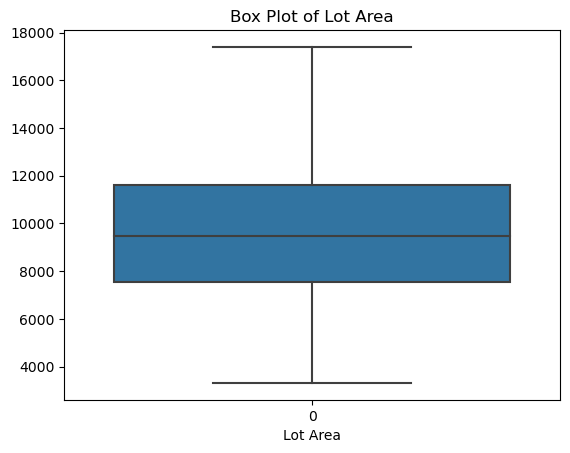

In [50]:
sns.boxplot(data['LotArea'])
plt.xlabel('Lot Area')
plt.title('Box Plot of Lot Area')
plt.show()

In [207]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

X = data.drop('SalePrice', axis=1,)
y = data['SalePrice']

# Identify numeric and categorical columns
# numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Impute missing values

# Numeric columns
# numeric_imputer = SimpleImputer(strategy='median')
# X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

# Categorical columns
# categorical_imputer = SimpleImputer(strategy='most_frequent')
# X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])
    
y = np.log1p(y)
X.drop(columns='Id', inplace=True)

In [208]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# encoded_data.head(5)
# encoded_data.describe()
# X = encoded_data.drop('SalePrice', axis=1,)
# y = encoded_data['SalePrice']
# X
# X.isnull().sum()
# y.isnull().sum()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=7,
                                                    test_size=0.2)
print(X_train.shape)
print(y_train.shape)
# X.describe()
# X_train.head(5)

(1166, 80)
(1166,)


In [209]:
from sklearn.metrics import mean_squared_error

# model = XGBRegressor(learning_rate=0.016972468699954325,
#                        n_estimators=2000,
#                        max_depth=4,
#                        min_child_weight=0,
#                        subsample=0.8,
#                        colsample_bytree=0.6,
#                        reg_alpha=0.4778795569577864,
#                        reg_lambda=0.546751795817796,
#                        objective='reg:squarederror',
#                        nthread=-1,
#                        random_state=42)
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=5000,
                                learning_rate=0.01,
                                max_depth=4,
                                min_samples_split=10,
                                max_features='sqrt',
                                random_state=42)
# Fit the model
# model.fit(X_train, y_train, early_stopping_rounds=30, 
#              eval_set=[(X_test, y_test)], verbose=False)

model.fit(X_train, y_train)
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

rmse_train, rmse_test

(0.022181778052850272, 0.12722658266718925)

In [210]:
test_file_path = "../input/house-prices-advanced-regression-techniques/test.csv"
test_data = pd.read_csv(test_file_path)
# print(test_data.isnull().sum())
ids = test_data.pop('Id')

# Handle missing values based on the context of the data
test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean(), inplace=True)
test_data['MasVnrArea'].fillna(0, inplace=True)
test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].median(), inplace=True)
test_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
object_columns_with_missing_values = test_data.select_dtypes(include='object').columns[test_data.select_dtypes(include='object').isnull().any()]
object_columns_with_missing_values
# Iterate over object columns with missing values
for column in object_columns_with_missing_values:
    mode_value = test_data[column].mode().iloc[0]  # Compute the mode for the column
    # Replace missing values with the mode
    test_data[column].fillna(mode_value, inplace=True)

# test_data['TotalBath'] = test_data['FullBath'] + test_data['HalfBath']
test_data['HasGarage'] = test_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test_data['HouseAge'] = test_data['YrSold'] - test_data['YearBuilt']
test_data["SqFtPerRoom"] = test_data["GrLivArea"] / (test_data["TotRmsAbvGrd"] +
                                                       test_data["FullBath"] +
                                                       test_data["HalfBath"] +
                                                       test_data["KitchenAbvGr"])

test_data['MeanRates'] = (test_data['OverallQual'] + test_data['OverallCond'])/2

test_data['TotalBathrooms'] = (test_data['FullBath'] + (0.5 * test_data['HalfBath']) +
                               test_data['BsmtFullBath'] + (0.5 * test_data['BsmtHalfBath']))

test_data["1st_and_2nd_SF"] = test_data["1stFlrSF"] + test_data["2ndFlrSF"]
# test_data = test_data.drop(columns=['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC'])
# test_data.info()

categorical_cols = test_data.select_dtypes(include='object').columns.tolist()

label_encoder = LabelEncoder()
for col in categorical_cols:
    test_data[col] = label_encoder.fit_transform(test_data[col])


test_data = test_data.fillna(0)
print(test_data.isnull().sum())

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [211]:
preds = model.predict(test_data)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': np.expm1(preds.squeeze())})

output.head()

,Id,SalePrice
0,1461,124141.067512
1,1462,162772.262643
2,1463,188041.219643
3,1464,191240.925530
4,1465,181084.522402


In [212]:
sample_submission_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = np.expm1(model.predict(test_data).squeeze())
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,124141.067512
1,1462,162772.262643
2,1463,188041.219643
3,1464,191240.925530
4,1465,181084.522402


In [149]:
# X_train.info()
different_columns_df1 = X_train.columns.difference(test_data.columns)
different_columns_df2 = test_data.columns.difference(X_train.columns)

different_columns_list_df1 = different_columns_df1.tolist()
different_columns_list_df2 = different_columns_df2.tolist()

print("df1中不同的列：", different_columns_list_df1)
print("df2中不同的列：", different_columns_list_df2)

df1中不同的列： ['Id']
df2中不同的列： []
